# <font color=Grey>**Data Mind Classes**</font> 
### <font color=Black>Class 9: Decision Trees & Random Forest </font> 

<div class="alert alert-block alert-info">

### ***Table of Contents***

<div class="alert alert-block alert-info">
- Concept of Weak Learners
- Entropy
- Information gain/Gini impurity
- Decision Trees
- Hyperparameters
- Ensemble Methods
- Why Ensembles work
- Random Forest
- Hyperparameters
- Example Walkthough Code
- Resources

# 1.0 What are Weak Learners

- `Models that do just about better than random guessing (~50% accuracy) in the context of classification`
- `Generally have less number of parameters`
- `Less complex in terms of model relationship. Eg. mostly (not always) linear decision boundaries`
- `Examples`:
> - `Shallow Decision Tree`
> - `Vanilla Linear Regression`
> - `Vanilla Logistic Regression`

# 2.0 Entropy (aka Shannon's Entropy)

-----------------------------------------------------------------------------------------------------
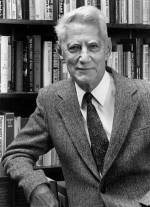
- `The concept of information entropy was introduced by Claude Shannon in his 1948 paper "A Mathematical Theory of Communication"`
- `Degree of chaos and unpredictability of a system/dataset`
- `Higher entropy implies lack of pattern in observations`
- `Indicates the impurity of a dataset`
- `Also used as variable prioritization technique`
- `Max value is very large number; Min value = 0`

## 2.1 Entropy Deep dive

----------------------------------------------------------------------------------

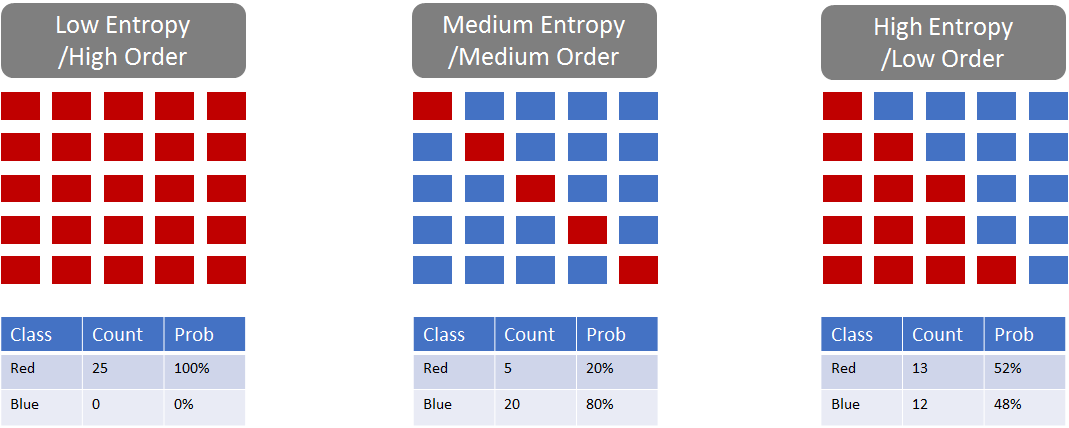

- `Low Entropy systems have high predictiveness about them. Eg:`
> - `Sun will rise in the east tomorrow`
> - `Night temperature will be lower than day temperature`
- ` On the other hand an unbiased coin toss has higher entropy with 50% prob for both outcomes`

### 2.1.1 **`Entropy Formula`**
---------------------------------------------------------------------------------------------------
$E(X)$ = $-\sum_{i=1}^{N}[p_i{}\log_2(p_i)]$

where: 
- $N$ = `Number of events in the analysis`
- $p_i$ = `Probability of` $i_{th}$ `event/class`
- `Unit of entropy is bits`

### **2.1.1.1 `Entropy in Code`**

In [33]:
import numpy as np
import pdb  ### demo python debugger usage

def entropy(Freq,trace=True):                    ### Class freq = [freq_class1,freq_class2,....freq_class(n)].
    '''
    return the Entropy of a probability distribution:
    entropy(p) = − SUM (Pi * log(Pi) )
    '''
    if trace:
        pdb.set_trace()
        
    ent = 0  ## initiate
    for freq in Freq:
        prob = freq/np.sum(Freq)       ## get class prob
        if prob != 0:                  ### log not defined for 0
            ent += prob*np.log2(prob)
        else:
            ent += 0
    ent *= -1
    return ent if ent!= 0 else -ent

In [35]:
print(entropy([1,1,2,4,5,6,8],trace=False))
print(entropy([3,7],False))
print(entropy([3,5],False))
print(entropy([6,24],False))
print(entropy([25,0],False))

2.49120544739
0.881290899231
0.954434002925
0.721928094887
0.0


### 2.1.2 Example

**`Case 1`**

- $P(Red) = 1$
- $P(Blue) = 0$
- $E(X)$ = $-[1*log_2(1)+0*log_2(0)]$ = $0$
- `Low Entropy`

------------------------------------------------------------

**`Case 2`**

- $P(Red) = 0.2$
- $P(Blue) = 0.8$
- $E(X)$ = $-[0.2*log_2(0.2)+0.8*log_2(0.8)]$ = $0.73$
- `Medium Entropy`
-----------------------------------------------------------
**`Case 3`**

- $P(Red) = 0.52$
- $P(Blue) = 0.48$
- $E(X)$ = $-[0.52*log_2(0.52)+0.48*log_2(0.48)]$ = $0.998$
- `High Entropy`

# 3.0 Information Gain
-------------------------------------------------------------------------------------------------------------
- `Measure of decrease in entropy of a system after carrying out certain data mining steps`
- `In the context of decision trees, the step refers to splitting a node into more tranches based on a criteria`
-  `I(Before split, After_split) = Entropy_before_split - Entropy_after_split`


## 3.1 Information gain example

### 3.1.0 Raw Data with Play as variable of interest ### 
----------------------------------------------------------------------------------------------				
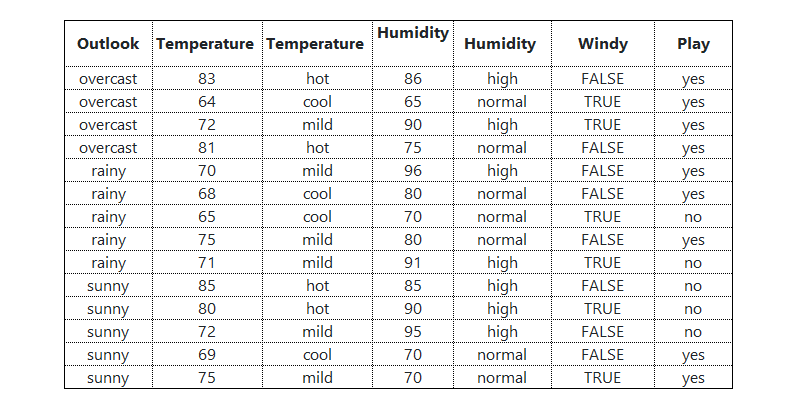

### 3.1.1 Starting Entropy ###

**`Starting Entropy of the system/dataset based on Play variable`**

- $Frequency(yes) = 9$
- $Frequency(no) = 5 $


$E_{start}(Play)$ = $-[\frac{9}{14}\log_2\frac{9}{14}+\frac{5}{14}\log_2\frac{5}{14}]$

$E_{start}(Play)$ = 0.94

### 3.1.2 Entropy with Outlook as node variable for splits and Play as dependent variable

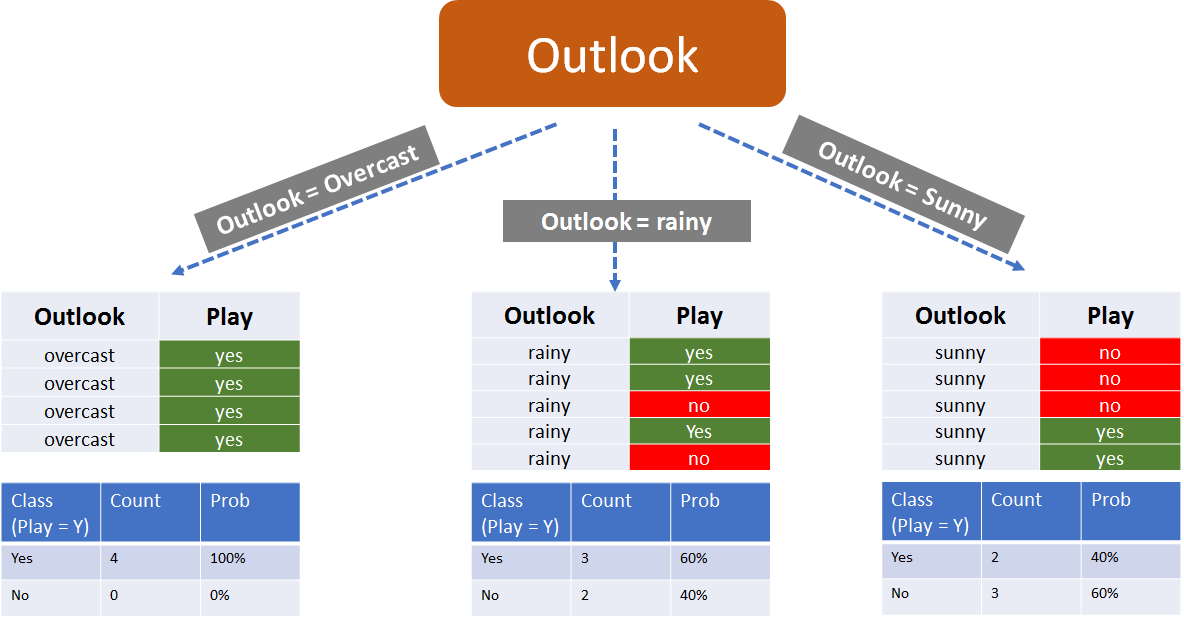

### 3.1.3 ** Entropy of the new system after split **

-------------------------------------------------------------------
$E_{new}(Play)$ = $W_1E_{outlook = overcast}+W_2E_{outlook = rainy}+W_3E_{outlook = sunny}$

> - $W_1,W_2,W_3$ are the respective sample proportions wrt parent node for each split

$E_{outlook = overcast}$ = $-[\frac{4}{4}\log_2\frac{4}{4}+\frac{0}{4}\log_2\frac{0}{4}] = 0$

$E_{outlook = rainy}$ = $-[\frac{3}{5}\log_2\frac{3}{5}+\frac{2}{5}\log_2\frac{2}{5}] = 0.97 $

$E_{outlook = sunny}$ = $-[\frac{2}{5}\log_2\frac{2}{5}+\frac{3}{5}\log_2\frac{3}{5}] = 0.97 $

$E_{new}(Play) = \frac{4}{14}*0+\frac{5}{14}*0.97+\frac{5}{14}0.97 = 0.69$

### 3.1.4 Information gain due to split on Outlook

-------------------------------------------------

$I(Before, after) = E(before) - E(after)$

$I(Before, after) = 0.94 - 0.69 = 0.25$

- `More the information gain after split the better the quality of split`
- `In general we try to mazimize info gain`

### 3.1.5 Information gain code

In [29]:
import pdb  ### demo python debugger usage

def gain(before, after, trace=True):   ### before, after are class frequencies at begining and leaf/end nodes
    '''
    return the information gain:
    gain(D, A) = entropy(D)−􏰋 SUM ( |Di| / |D| * entropy(Di) )
    '''
    if trace:
        pdb.set_trace()
    total = 0
    for elem in after:    ### iterate over all splits
        total += sum(elem) / sum(before) * entropy(elem, trace=False)   ### sum(before) = total obs size; sum(elem) = obs in each leaf node

    Info_gain = entropy(before,trace=False) - total
    return Info_gain

In [30]:
# set of example of the dataset
playTennis = [9, 5] # Yes, No

# attribute, number of members (feature)
outlook = [
    [4, 0],  # overcase [yes = 4, no = 0]
    [2, 3],  # sunny
    [3, 2]   # rain
]
temperature = [
    [2, 2],  # hot
    [3, 1],  # cool
    [4, 2]   # mild
]
humidity = [
    [3, 4],  # high
    [6, 1]   # normal
]
wind = [
    [6, 2],  # weak
    [3, 3]   # strong
]

In [32]:
print(gain(playTennis, outlook,trace=True))

> <ipython-input-29-569b09e71a17>(10)gain()
-> total = 0
(Pdb) a
before = [9, 5]
after = [[4, 0], [2, 3], [3, 2]]
trace = True
(Pdb) q


BdbQuit: 

In [36]:
print(gain(playTennis, temperature ,trace=False))
print(gain(playTennis, humidity, False))
print(gain(playTennis, wind, False))

0.029222565659
0.151835501362
0.0481270304083


### 3.2 Gini Impurity as an optimization criteria

-------------------------------------------------------------------

- `Measures misclassification error`
- `We can use this as optimization criteria such that the resultant splits have minimal misclassification`
- `We can also use Maximizing information gain as our optimization criteria`

# 4.0 Decision Tree Algorithm aka CART (Classification & Regression Trees)

**<font size=4 color= Grey > Example from Titanic dataset <font>**

-----------------------------------------------------------------------------------------

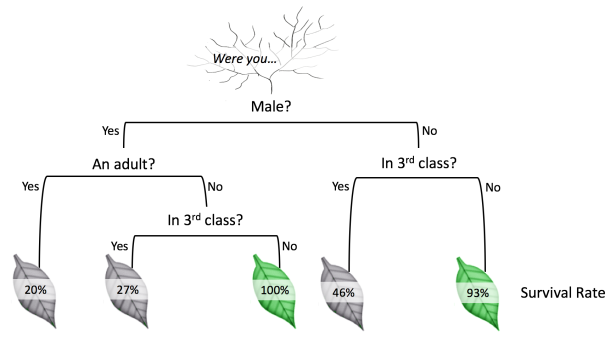

In [ ]:
from IPython.display import HTML

** Example of growing tree on titanic set: **
<img src="https://annalyzin.files.wordpress.com/2016/07/decision-tree-tutorial-animated3.gif">

### **<font color=Black>4.1.0 Properties of Decision trees: </font> **

---------------------------------------------------------------------------------------
- `Tree based models that works in a greedy manner (optimizes only the immediate next step) `
- `Roots at the top with nodes/branches at the bottom`
- **`Considered a weak learner`**
- **`Linear Decision boundary`**
- `Interpretable so sells in consuting environments`
- `Optimizes only the immediate step and the entire tree might not be the most optimal one overall`
- `Recursively select variables for splitting a parent node that optimize a given criteria (info gain, gini impurity)`
- `Stop growth when certain criteria is met (eg: minimum increase in info gain or min decrease in gini impurity)`
- `Prune the tree to generalize better for validation sets`

### **<font color=Black>4.1.1 Important Hyperparameters: </font> **
- **`Optimization Criteria : Gini impurity or Entropy/Info gain`**
- **`Max Depth - Build trees with max. d depth deep; d = Number of nodes from top`**
- **`min_samples_split: The minimum number of samples required to split an internal node`**
- **`min_samples_leaf: The minimum number of samples required to be at a leaf node`**
- **`max_features: The number of features to consider when looking for the best split`**
- **`min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value`**
- **`class_weight:Weights associated with classes in the form {class_label: weight}`**


** <font size=1.25 > More details: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html </font>**

## 4.2 Walkthough on Titanic dataset

In [ ]:
# https://www.kaggle.com/c/titanic/data

In [37]:
# Import libs and load data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('C:/Users/rajneesh.tiwari/Downloads/titanic.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
## Summarize

from pandas_summary import DataFrameSummary
_ = DataFrameSummary(data_train)
_.columns_stats

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,891,891,891,891,891,714,891,891,891,891,204,889
uniques,891,2,3,891,2,88,7,7,681,248,147,3
missing,0,0,0,0,0,177,0,0,0,0,687,2
missing_perc,0%,0%,0%,0%,0%,19.87%,0%,0%,0%,0%,77.10%,0.22%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


- `Age, Cabin and Embarked have missing values`
- `Name is unique, meaning each value if different and no repeatations `

## EDA

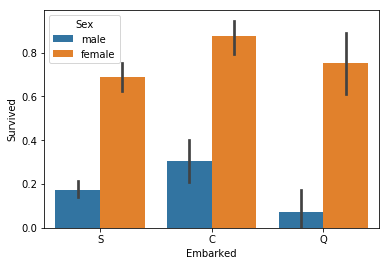

In [39]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train);

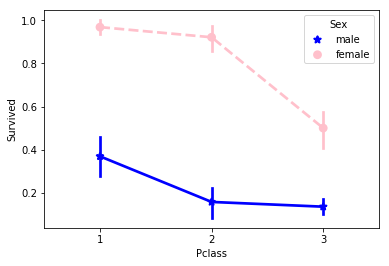

In [41]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

## Missing value imputation, Feature Engg

- `It is recommended to try and convert numeric variables to logical categorical (one hot) representations as generally it leads to better model performance`
- `Impute all missing values in Age, Embarked, Cabin`
- `We will convert Age,Fare (after missing fill) to such brackets`

In [42]:
## Missing imputation - Embarked

#Lets check which rows have null Embarked column
data_train[data_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


`Both have Passenger class 1 and fare 80. So maybe we can try and figure out which boarding point had most class 1 passengers and what was their median/mean fare. If it comes close to 80 then we will replace null with that boarding point`

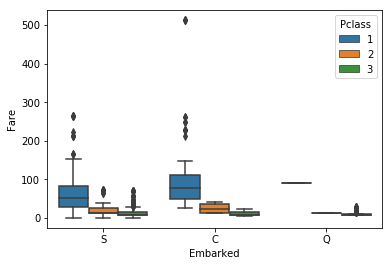

In [43]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=data_train);

`We can see that for 1st class median line is coming around fare $80 for embarked value 'C'. So we can replace NA values in Embarked column with 'C'`

In [44]:
data_train["Embarked"] = data_train["Embarked"].fillna('C')

In [45]:
## Missing imputation - Cabin
## We will drop cabin as it has more than 50% mising data

data_train.drop('Cabin',inplace=True,axis=1)

`Missing impuration Age - We will assign unknown category to missing age variable`

In [46]:
# To replace fare in categories

data_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [47]:
### Generic function to bucketize age, Fare, prefix and lastname from name column

def simplify_ages(df):
    df['Age'] = df['Age'].fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

# def simplify_cabins(df):   ### we already dropped cabin above
#     df.Cabin = df.Cabin.fillna('N')
#     df.Cabin = df.Cabin.apply(lambda x: x[0])
#     return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    #df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,"Allen,",Mr.


# Some Final Encoding

- Convert all categorical variables to one hot represenatations 
- Note that we are working mainly with cateogry data (except Parch, SibSp) as we have converted all the numeric ones to buckets

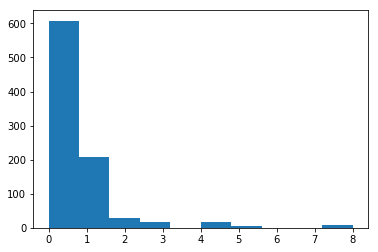

In [48]:
## plot of SibSp
plt.hist(data_train.SibSp);

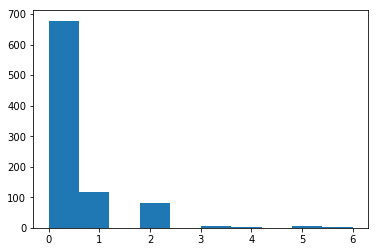

In [49]:
plt.hist(data_train.Parch);

In [ ]:
#data_train.columns

In [50]:
from sklearn import preprocessing
def encode_features(df_train):
    cat_features = ['Fare', 'Age', 'Sex', 'Lname', 'NamePrefix']
    
    for feature in cat_features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train
    
data_train = encode_features(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,73,17
1,2,1,1,0,0,1,0,3,136,18
2,3,1,3,0,7,0,0,0,251,14
3,4,1,1,0,7,1,0,3,198,18
4,5,0,3,1,7,0,0,1,11,17


## Validation Setup : 80-20 split

In [87]:
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

sz = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=sz, random_state=23)

Trying Depth:1
Train accuracy: 78.65 
Validation accuracy: 78.77%
AUC ROC score is 0.76
--------------------------------------------------
Trying Depth:2
Train accuracy: 78.93 
Validation accuracy: 76.54%
AUC ROC score is 0.79
--------------------------------------------------
Trying Depth:3
Train accuracy: 82.44 
Validation accuracy: 78.77%
AUC ROC score is 0.83
--------------------------------------------------
Trying Depth:4
Train accuracy: 84.41 
Validation accuracy: 79.33%
AUC ROC score is 0.84
--------------------------------------------------
Trying Depth:5
Train accuracy: 85.96 
Validation accuracy: 79.33%
AUC ROC score is 0.85
--------------------------------------------------
Trying Depth:6
Train accuracy: 88.20 
Validation accuracy: 77.65%
AUC ROC score is 0.85
--------------------------------------------------
Trying Depth:7
Train accuracy: 90.31 
Validation accuracy: 79.33%
AUC ROC score is 0.83
--------------------------------------------------
Trying Depth:8
Train accura

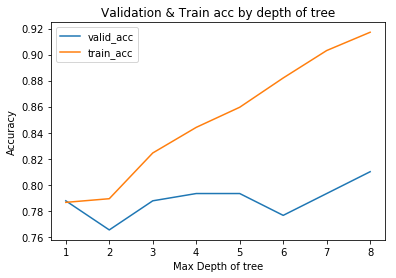

In [88]:
## Run model on train and evaluation on validation
from sklearn import tree
from sklearn.metrics import accuracy_score, roc_auc_score

max_attributes = len(list(X_train))
depth_range = range(1, max_attributes + 1)
val_acc = []

for depth in depth_range:
    print("Trying Depth:{}".format(depth))
    Dtree = tree.DecisionTreeClassifier(max_depth = depth,max_features = max_attributes,criterion = 'gini')
    Dtree.fit(X_train,y_train)
    pred_prob  = Dtree.predict_proba(X_test)   ### gives probs
    pred = Dtree.predict(X_test) ### gives labels directly
    valid_acc = accuracy_score(y_test, pred)
    train_acc = accuracy_score(y_train, Dtree.predict(X_train))
    auc_roc = roc_auc_score(y_test, pred_prob[:,1])
    val_acc.append({'depth':depth,'val_acc':valid_acc,'trn_acc':train_acc})
    print("Train accuracy: {:.2f} \nValidation accuracy: {:.2f}%".format(train_acc*100,valid_acc*100))
    print("AUC ROC score is {:.2f}".format(auc_roc))
    print ("-"*50)
    
import matplotlib.pyplot as plt
plt.plot(pd.DataFrame(val_acc).depth,pd.DataFrame(val_acc).val_acc,label="valid_acc")
plt.plot(pd.DataFrame(val_acc).depth,pd.DataFrame(val_acc).trn_acc,label='train_acc')
plt.title("Validation & Train acc by depth of tree")
plt.xlabel("Max Depth of tree")
plt.ylabel("Accuracy")
plt.legend()

best_depth = val_acc[np.argmax(pd.DataFrame(val_acc).val_acc,axis=0)]['depth']
best_acc = val_acc[np.argmax(pd.DataFrame(val_acc).val_acc,axis=0)]['val_acc']
print("Optimal Depth:{} with validation accuracy {:.1f}%".format(best_depth,best_acc*100)) ### based only on val acc; we should also see that we are massively overfitting

In [89]:
## Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(pred, y_test)

array([[96, 15],
       [19, 49]], dtype=int64)

In [90]:
tn, fp, fn, tp = confusion_matrix(pred, y_test).ravel()

print("True positive: {}".format(tp))
print("False positive: {}".format(fp))
print("True negative: {}".format(tn))
print("False negative: {}".format(fn))
print("Accuracy :{}".format((tp+tn)/(tp+fp+tn+fn)))

True positive: 49
False positive: 15
True negative: 96
False negative: 19
Accuracy :0.8100558659217877


In [55]:
feat = ['Pclass','Sex','Age','SibSp','Parch','Fare','Lname','NamePrefix']
#class_names =[]

In [56]:
X_all.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Lname,NamePrefix
0,3,1,4,1,0,0,73,17
1,1,0,0,1,0,3,136,18
2,3,0,7,0,0,0,251,14
3,1,0,7,1,0,3,198,18
4,3,1,7,0,0,1,11,17


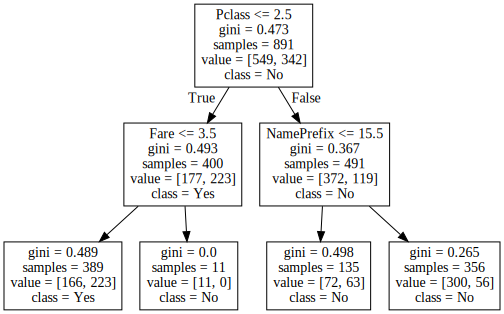

In [57]:
# plotting the decision tree to understand rules

from IPython.display import Image  
import pydotplus
import graphviz 

Dtree = tree.DecisionTreeClassifier(max_depth = 2,max_features = 4,criterion = 'gini') 
Dtree.fit(X_all, y_all)
dot_data = tree.export_graphviz(Dtree, out_file=None, 
                                feature_names=feat,  
                                class_names=["No","Yes"])
graph = graphviz.Source(dot_data)  
graph

In [58]:
## Gini calculation formula for the left most cell
a = np.power(37/97,2)
b = np.power(60/97,2)
(1-(a+b))

0.47188861728132636

### Notes for Regression using Decision Tree

- **`Criteria`**: `Minimization of std deviation in prediction nodes`
- `Does not output continuous predictions, but fixed quantities in categories are predicted`

# 5.0 Ensemble Models

- `Ensembling models combine predictions of multiple diverse weak sub-models`
- `Generally, the sub-models should be independent/not-correlated of each other`
- `There are primarily three distinct model types in ensemble models:`
> - **`Bagging models - RandomForest`**
> - **`Boosting models - XGBoost, LightGBM`**
> - **`Stacking models - Multiple weak learners combined with a meta learner, mostly custom`**

- **`Benefits`**
> - **`Decrease variance`** - Since we are taking inputs from multiple models this leads to decrease in overfitting or variance error
> - **`Decrease bias`** - In general accuracy also increases so we are able to get to the right predictions by leveraging enembles

### 5.1 Bagging Models 

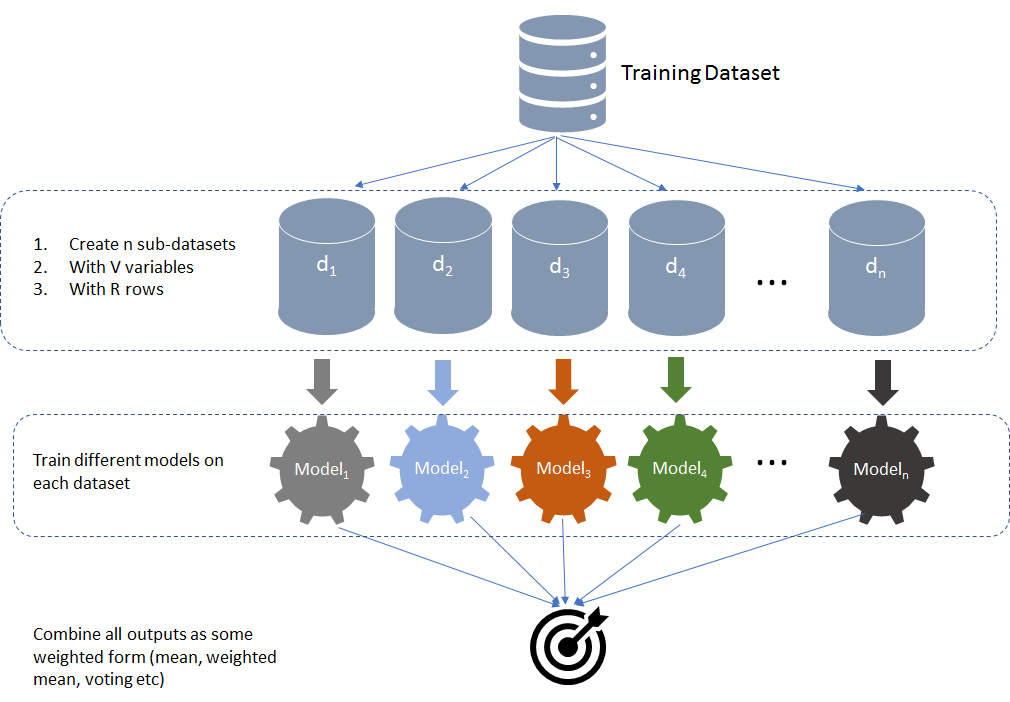

### 5.2 `Bagging model parameters`

> - **`Seed value`**
> - **`Row sampling`**
> - **`Feature sub sampling`**
> - **`Number of models`**

### 5.3 `Bagging example Linear Regression`


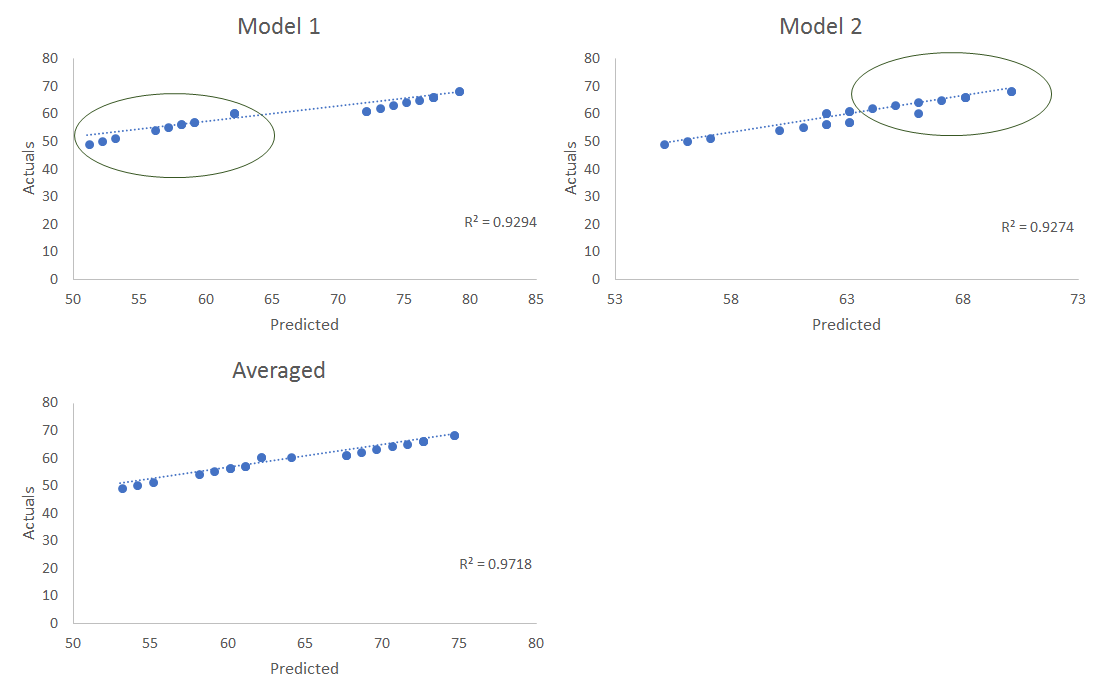

In [59]:
### For Classification
from sklearn.metrics import accuracy_score

Targets         =  [0,1,1,0,1,0,0,1]
Model1_pred     =  [0,0,1,1,0,0,0,1]
Model2_pred     =  [0,0,0,0,1,0,0,0]
Model3_pred     =  [1,1,1,0,1,1,0,1]
Voting_Ensemble =  [0,0,1,0,1,0,0,1]  ### simply the most frequent value from model1,model2, model3 / mode

Model1_accuracy = accuracy_score(Targets,Model1_pred)
Model2_accuracy = accuracy_score(Targets,Model2_pred)
Model3_accuracy = accuracy_score(Targets,Model3_pred)
Ensemble_accuracy = accuracy_score(Targets,Voting_Ensemble)

print("Model 1 accuracy {}".format(Model1_accuracy*100))
print("Model 2 accuracy {}".format(Model2_accuracy*100))
print("Model 3 accuracy {}".format(Model3_accuracy*100))
print("Ensemble accuracy {}".format(Ensemble_accuracy*100))

Model 1 accuracy 62.5
Model 2 accuracy 62.5
Model 3 accuracy 75.0
Ensemble accuracy 87.5


# 6.0 Random Forest

- **`A random forest is a meta estimator that fits a number of decision tree models on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting`**
<br>  


- `Bagging of multiple shallow decision trees`
    - `Less depth of trees typically =< 5`
    - `sub-sampling rows` 
    - ` Sub sampling columns`
    - `Sub sampling helps to avoid correlation b/w tree models so we get best output by ensembling `
<br>


- **`Important Hyper Parameters`**:
    - **`Max Depth: The maximum depth of the tree`**
    - **`max_features: The number of features to consider when looking for the best split `**
    - **`n_estimators: Number of tree models to be built`**
    - **`Random_state: Random seed for reproducability`**
    - **`Criterion: Regression or Classification criteria (eg: Gini, Info gain etc)`**
- **`Hyperparamters tuned by k fold CV or 80-20/70-30 train-valid split`**

<font size =1.5> Details: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## 6.1 Walkthough on Titanic dataset

In [ ]:
# https://www.kaggle.com/c/titanic/data

In [60]:
# Import libs and load data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('C:/Users/rajneesh.tiwari/Downloads/titanic.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
## Summarize

from pandas_summary import DataFrameSummary
_ = DataFrameSummary(data_train)
_.columns_stats

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,891,891,891,891,891,714,891,891,891,891,204,889
uniques,891,2,3,891,2,88,7,7,681,248,147,3
missing,0,0,0,0,0,177,0,0,0,0,687,2
missing_perc,0%,0%,0%,0%,0%,19.87%,0%,0%,0%,0%,77.10%,0.22%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


- `Age, Cabin and Embarked have missing values`
- `Name is unique, meaning each value if different and no repeatations `

## EDA

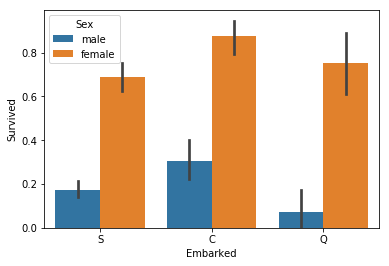

In [62]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train);

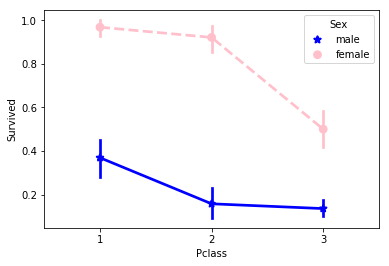

In [63]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

## Missing value imputation, Feature Engg

- `It is recommended to try and convert numeric variables to logical categorical (one hot) representations as generally it leads to better model performance`
- `Impute all missing values in Age, Embarked, Cabin`
- `We will convert Age,Fare (after missing fill) to such brackets`

In [64]:
## Missing imputation - Embarked

#Lets check which rows have null Embarked column
data_train[data_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


`Both have Passenger class 1 and fare 80. So maybe we can try and figure out which boarding point had most class 1 passengers and what was their median/mean fare. If it comes close to 80 then we will replace null with that boarding point`

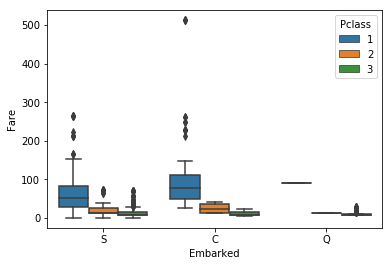

In [65]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=data_train);

`We can see that for 1st class median line is coming around fare $80 for embarked value 'C'. So we can replace NA values in Embarked column with 'C'`

In [66]:
data_train["Embarked"] = data_train["Embarked"].fillna('C')

In [67]:
## Missing imputation - Cabin
## We will drop cabin as it has more than 50% mising data

data_train.drop('Cabin',inplace=True,axis=1)

`Missing impuration Age - We will assign unknown category to missing age variable`

In [68]:
# To replace fare in categories

data_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [69]:
### Generic function to bucketize age, Fare, prefix and lastname from name column

def simplify_ages(df):
    df['Age'] = df['Age'].fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

# def simplify_cabins(df):   ### we already dropped cabin above
#     df.Cabin = df.Cabin.fillna('N')
#     df.Cabin = df.Cabin.apply(lambda x: x[0])
#     return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    #df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,"Allen,",Mr.


# Some Final Encoding

- Convert all categorical variables to one hot represenatations 
- Note that we are working mainly with cateogry data (except Parch, SibSp) as we have converted all the numeric ones to buckets

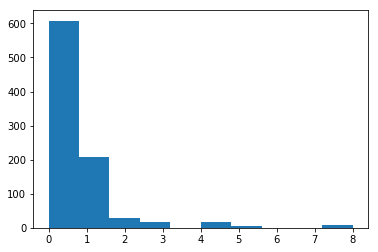

In [70]:
## plot of SibSp
plt.hist(data_train.SibSp);

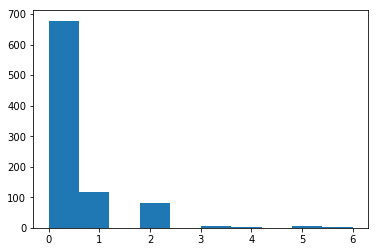

In [71]:
plt.hist(data_train.Parch);

In [ ]:
#data_train.columns

In [72]:
from sklearn import preprocessing
def encode_features(df_train):
    cat_features = ['Fare', 'Age', 'Sex', 'Lname', 'NamePrefix']
    
    for feature in cat_features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train
    
data_train = encode_features(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,73,17
1,2,1,1,0,0,1,0,3,136,18
2,3,1,3,0,7,0,0,0,251,14
3,4,1,1,0,7,1,0,3,198,18
4,5,0,3,1,7,0,0,1,11,17


## Validation Setup : 5 fold CV

In [73]:
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

# sz = 0.20
# X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=sz, random_state=23)

#### Search Space Definition for hyperparamters

In [74]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 6, num = 1)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [2], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


#### Randomized Search over larger search space to get to narrow/better hyperparatmers

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_all, y_all)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [2], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [76]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1800}

- `Fine tuning in honed search space using gridsearchcv. Note that RandomizedSearchCV is used to explore more broad search space while gridsearchcv is used for more refined settings.` 
- `In RandomizedSearchCV not all combinations are evaluated but in grid search all possible combinations are evaluated, so we must be careful`

#### Grid search over best hyperparamters from randomsearch. We should take $value \pm \delta$ for each parameter and then put those in grid search to get to best possible values

In [77]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [2, 3],
    'max_features': [2, 3],  ### auto means sqrt features
    'min_samples_leaf': [4,5],
    'min_samples_split': [4,5,6],
    'n_estimators': [1700, 1800, 1900]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [78]:
## get best params
grid_search.fit(X_all, y_all)
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  9.3min finished


{'bootstrap': False,
 'max_depth': 3,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1700}

### Final RandomForest model after hyperparamter optimization using GridSearchCV

In [79]:
Final_model = grid_search.best_estimator_

from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

sz = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=sz, random_state=23)

In [80]:
pred = Final_model.predict(X_test)
pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [81]:
## Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(pred, y_test)

array([[100,  21],
       [ 15,  43]], dtype=int64)

In [85]:
tn, fp, fn, tp = confusion_matrix(pred, y_test).ravel()

print("True positive: {}".format(tp))
print("False positive: {}".format(fp))
print("True negative: {}".format(tn))
print("False negative: {}".format(fn))
print("Accuracy :{}".format((tp+tn)/(tp+fp+tn+fn)))

True positive: 43
False positive: 21
True negative: 100
False negative: 15
Accuracy :0.7988826815642458


## Resources

https://www.kdnuggets.com/2016/09/decision-trees-disastrous-overview.html